In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
df = pd.read_csv("C:\\Users\\Abhay\\OneDrive\\Desktop\\character_recognition\\A_Z Handwritten Data.csv").astype('float32')

In [5]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X = df.drop('0', axis = 1)
Y = df['0']
X = X.to_numpy()
Y = Y.to_numpy().reshape(-1,1)

In [7]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [8]:
print(f"Train_shape: {x_train.shape}")
print(f"Val_shape: {x_val.shape}")
print(f"Test_shape: {x_test.shape}")

Train_shape: (238368, 784)
Val_shape: (59592, 784)
Test_shape: (74490, 784)


In [9]:
print(y_train.shape)
print(y_test.shape)

(238368, 1)
(74490, 1)


In [10]:
labels = {}
for i in range(26):
    labels[i] = chr(i+65)


In [11]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """ 
    n = z.shape[0]
    a = np.zeros(n)
    s = np.sum(np.exp(z))
    for i in range(n):
        a[i] = np.exp(z[i])/s
    return a

In [12]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

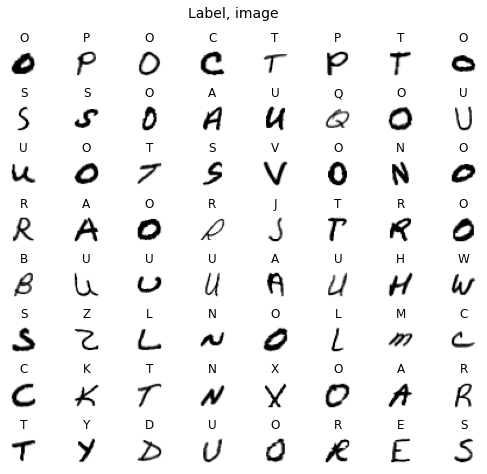

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = x_train.shape
fig, axes = plt.subplots(8,8, figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    x_random_reshaped = x_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(x_random_reshaped, cmap='binary')
    
    # Display the label above the image
    ax.set_title(labels[y_train[random_index, 0]])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [54]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(units=200, activation="relu", name="L1"),
        Dense(units=100, activation="relu", name="L2"),
        Dense(units=26, activation="linear", name="L3") 
    ], name = "my_model" 
)

In [55]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 200)               157000    
                                                                 
 L2 (Dense)                  (None, 100)               20100     
                                                                 
 L3 (Dense)                  (None, 26)                2626      
                                                                 
Total params: 179,726
Trainable params: 179,726
Non-trainable params: 0
_________________________________________________________________


In [56]:
[layer1, layer2, layer3] = model.layers

In [57]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 200), b1 shape = (200,)
W2 shape = (200, 100), b2 shape = (100,)
W3 shape = (100, 26), b3 shape = (26,)


In [58]:
# Adam optimizer is used. 
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [
        tf.keras.metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy", dtype=None)
    ],
)

history = model.fit(
    x_train,y_train,
    epochs=10,
    validation_data=(x_val, y_val),
)

Epoch 1/10
7449/7449 [==============================] - 133s 18ms/step - loss: 0.9874 - sparse_categorical_accuracy: 0.8476 - val_loss: 0.4053 - val_sparse_categorical_accuracy: 0.8965
Epoch 2/10
7449/7449 [==============================] - 142s 19ms/step - loss: 0.2870 - sparse_categorical_accuracy: 0.9239 - val_loss: 0.2780 - val_sparse_categorical_accuracy: 0.9295
Epoch 3/10
7449/7449 [==============================] - 124s 17ms/step - loss: 0.2458 - sparse_categorical_accuracy: 0.9364 - val_loss: 0.2489 - val_sparse_categorical_accuracy: 0.9349
Epoch 4/10
7449/7449 [==============================] - 117s 16ms/step - loss: 0.2285 - sparse_categorical_accuracy: 0.9422 - val_loss: 0.2250 - val_sparse_categorical_accuracy: 0.9462
Epoch 5/10
7449/7449 [==============================] - 121s 16ms/step - loss: 0.2166 - sparse_categorical_accuracy: 0.9463 - val_loss: 0.2150 - val_sparse_categorical_accuracy: 0.9494
Epoch 6/10
7449/7449 [==============================] - 122s 16ms/step - lo

In [59]:
history.history

{'loss': [0.9874228835105896,
  0.28700220584869385,
  0.24576811492443085,
  0.22853824496269226,
  0.21655027568340302,
  0.2131364643573761,
  0.2038719803094864,
  0.20560501515865326,
  0.2016621083021164,
  0.20254358649253845],
 'sparse_categorical_accuracy': [0.8476054072380066,
  0.9239285588264465,
  0.9363631010055542,
  0.9422069787979126,
  0.946322500705719,
  0.9486172795295715,
  0.9512644410133362,
  0.9516419768333435,
  0.9525901079177856,
  0.9534501433372498],
 'val_loss': [0.4053305685520172,
  0.27798083424568176,
  0.24891330301761627,
  0.2250286340713501,
  0.21497662365436554,
  0.2491830289363861,
  0.23873071372509003,
  0.24332059919834137,
  0.24971532821655273,
  0.2843080461025238],
 'val_sparse_categorical_accuracy': [0.8965129256248474,
  0.9294536113739014,
  0.9349241256713867,
  0.9462175965309143,
  0.949372410774231,
  0.9466203451156616,
  0.9453449845314026,
  0.9466371536254883,
  0.9516378045082092,
  0.9418714046478271]}

In [60]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,2, figsize = (12,6))
    widgvis(fig)
    ax[0].plot(history.history['loss'], label='loss')
    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].set_ylim([0, 2])
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('loss (cost)')
    ax[0].legend()
    ax[0].grid(True)
    
    ax[1].plot(history.history['sparse_categorical_accuracy'], label='Training accuracy')
    ax[1].plot(history.history['val_sparse_categorical_accuracy'], label='Validation accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    plt.show()

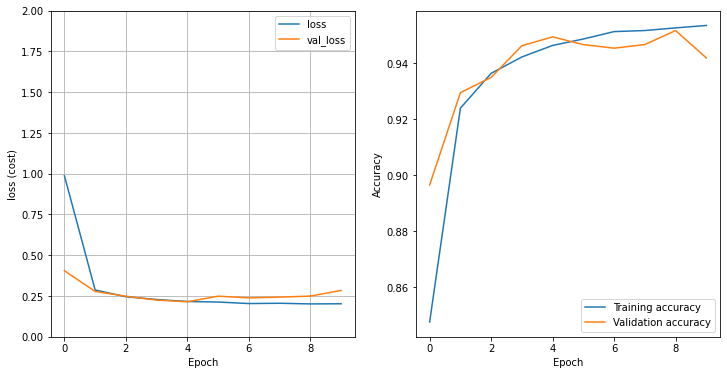

In [61]:
plot_loss_tf(history)

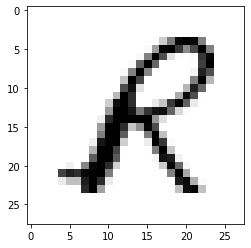

1/1 [==============================] - 0s 45ms/step
 Largest Prediction index: R
 Actual Label: R


In [62]:
def display_digit(X):
    x_reshaped = X.reshape((28,28))
    # Display the image
    plt.imshow(x_reshaped, cmap='binary')
    plt.show()

image = x_train[5785]
display_digit(image)

prediction = model.predict(image.reshape(1,784))

prediction_p = my_softmax(prediction.reshape(-1,))

y_cap = np.argmax(prediction_p)
print(f" Largest Prediction index: {labels[y_cap]}")
print(f" Actual Label: {labels[y_train[5785][0]]}")

In [63]:
## Testing the Model

results = model.evaluate(x_test, y_test, batch_size=128)
print(f"Training Accuracy: {history.history['sparse_categorical_accuracy'][-1]:.2f}")
print(f"Validation Accuracy: {history.history['val_sparse_categorical_accuracy'][-1]:.2f}")
print(f"Testing Accuracy: {results[1]:.2f}")

582/582 [==============================] - 4s 6ms/step - loss: 0.2849 - sparse_categorical_accuracy: 0.9416
Training Accuracy: 0.95
Validation Accuracy: 0.94
Testing Accuracy: 0.94


In [64]:
# Wrong predictions in training set

m = x_train.shape[0]
pred = []
incorrect_pred = []
for i in range(1000):
    prediction = model.predict(x_train[i].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    pred.append(yhat)
    if yhat != y_train[i][0]:
        incorrect_pred.append(i)
    

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


In [65]:
print(len(incorrect_pred))
model.save("my_model.h5")

60
